# Dataset

## `yfinance`

To gather data for Apple and Amazon stocks, we used `yfinance`. First, we need to install `yfinance` library by running the following:

In [ ]:
!pip install yfinance --quiet

Now we are able to use `yfinance` library.

In [ ]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
start_date_aapl = "1980-12-12"   # Apple's first day on the stock market
end_date_aapl   = "2023-06-24"

start_date_amzn = "1990-05-15"   # Amazon's first day on the stock market
end_date_amzn   = "2023-06-24"

apple_ticker  = "AAPL"
amazon_ticker = "AMZN"

apple_data  = yf.download(apple_ticker, start=start_date_aapl, end=end_date_aapl)
amazon_data = yf.download(amazon_ticker, start=start_date_amzn, end=end_date_amzn)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
print("----------------------------------- APPLE DATASET -----------------------------------\n")
apple_data.info()

----------------------------------- APPLE DATASET -----------------------------------

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10722 entries, 1980-12-12 to 2023-06-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10722 non-null  float64
 1   High       10722 non-null  float64
 2   Low        10722 non-null  float64
 3   Close      10722 non-null  float64
 4   Adj Close  10722 non-null  float64
 5   Volume     10722 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 586.4 KB


In [ ]:
print("------------------------------------ APPLE STATISTICS ----------------------------------\n")
apple_data.describe()

------------------------------------ APPLE STATISTICS ----------------------------------



,Open,High,Low,Close,Adj Close,Volume
count,10722.000000,10722.000000,10722.000000,10722.000000,10722.000000,1.072200e+04
mean,18.053570,18.258038,17.856640,18.066092,17.355460,3.247330e+08
std,38.035402,38.486993,37.615237,38.073492,37.705297,3.371155e+08
min,0.049665,0.049665,0.049107,0.049107,0.038102,0.000000e+00
25%,0.290179,0.299107,0.283482,0.290821,0.239435,1.189004e+08
50%,0.495536,0.502589,0.488839,0.495536,0.411250,2.119840e+08
75%,17.831339,17.958482,17.680357,17.839553,15.458376,4.045237e+08
max,186.729996,187.559998,185.009995,187.000000,187.000000,7.421641e+09


In [ ]:
print("---------------------------------- AMAZON DATASET ----------------------------------\n")
amazon_data.info()

---------------------------------- AMAZON DATASET ----------------------------------

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6570 entries, 1997-05-15 to 2023-06-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6570 non-null   float64
 1   High       6570 non-null   float64
 2   Low        6570 non-null   float64
 3   Close      6570 non-null   float64
 4   Adj Close  6570 non-null   float64
 5   Volume     6570 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 359.3 KB


In [ ]:
print("----------------------------------- AMAZON STATISTICS ---------------------------------\n")
amazon_data.describe()

----------------------------------- AMAZON STATISTICS ---------------------------------



,Open,High,Low,Close,Adj Close,Volume
count,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000,6.570000e+03
mean,32.282669,32.673466,31.856915,32.272874,32.272874,1.418967e+08
std,48.468935,49.041904,47.835286,48.438022,48.438022,1.397720e+08
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06
25%,2.009125,2.043750,1.977125,2.010625,2.010625,6.848650e+07
50%,6.556000,6.646000,6.481250,6.568000,6.568000,1.054210e+08
75%,40.291124,40.653249,40.139001,40.407875,40.407875,1.600985e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09


## Plots

To gain an understanding of the data's structure, we can plot meaningful features  such as the `Open` price, `Volume` and so other relevant features.

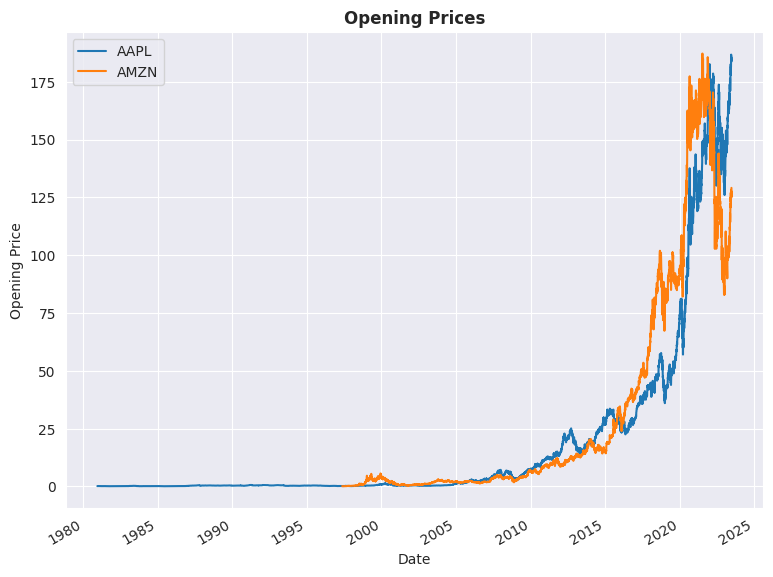

In [ ]:
sns.set_style("darkgrid")

# Plotting opening prices
apple_data['Open'].plot(figsize=(9, 7), label='AAPL')
amazon_data['Open'].plot(figsize=(9, 7), label='AMZN')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.title('Opening Prices', fontweight='bold')
plt.legend()
plt.show()

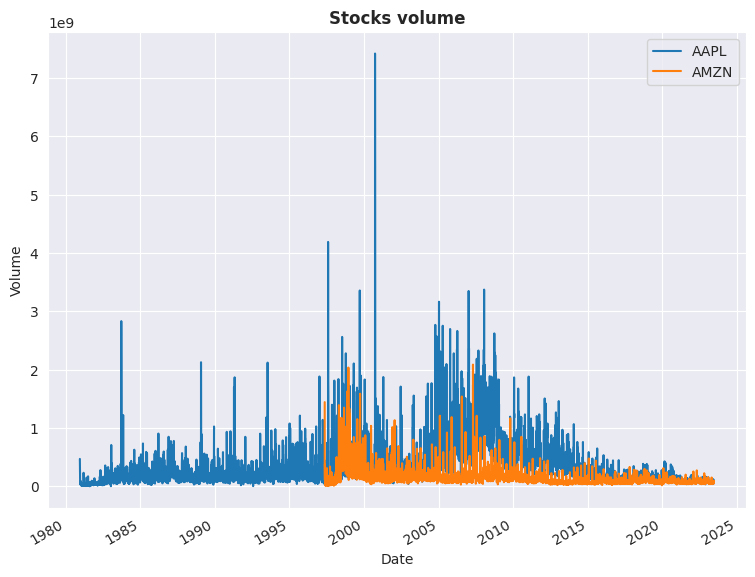

In [ ]:
# Plotting volume
apple_data['Volume'].plot(figsize=(9, 7), label='AAPL')
amazon_data['Volume'].plot(figsize=(9, 7), label='AMZN')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stocks volume', fontweight='bold')
plt.legend()
plt.show()

## Moving average

Since our objective is to predict the trend of the closing price for both `AAPL` and `AMZN` stocks, it would be useful to examine how both stocks historically behaved. To obtain meaningfull insights, we will use **moving averages**.

Moving averages are used to identify significant *support* and *resistance* levels:
* In a *downtrend*, prices fall because there is an excess of supply over demand. The lower prices go, the more attractive prices become to those waiting to buy the shares. At some level, demand that would have been slowly increasing will rise to the level where it matches supply. At this point, prices will stop falling. This is **support**.
* **Resistance** is the opposite of support. Prices move up because there is more demand than supply. As prices move higher, there will come a point when selling will overwhelm the desire to buy.

Once an area or “zone” of support or resistance has been identified, those price levels can serve as potential entry or exit points because, as price reaches a point of previous support or resistance, it will do one of two things: bounce back away from the support or resistance level, or violate the price level and continue in its prior direction—until it hits the next support or resistance level.

Traders observe the crossover of shorter-term moving averages by longer-term moving averages as a potential signal of trend changes. This insight can help them identify the next support or resistance level in the price movement.

Let’s calculate 50 days (short term) and 200 days (long term) MA on both `AAPL` and `AMZN` closing prices:

In [ ]:
short_term = 50;
long_term  = 200;

AAPL_MA = [[], []]
AMZN_MA = [[], []]

# Calculate the short term (20-day) moving average for AAPL
AAPL_MA[0] = apple_data['Close'].rolling(window=short_term).mean()

# Calculate the long_term (200-day) moving average for AAPL
AAPL_MA[1] = apple_data['Close'].rolling(window=long_term).mean()

# Calculate the short term (20-day) moving average for AMZN
AMZN_MA[0] = amazon_data['Close'].rolling(window=short_term).mean()

# Calculate the long_term (200-day) moving average for AMZN
AMZN_MA[1] = amazon_data['Close'].rolling(window=long_term).mean()


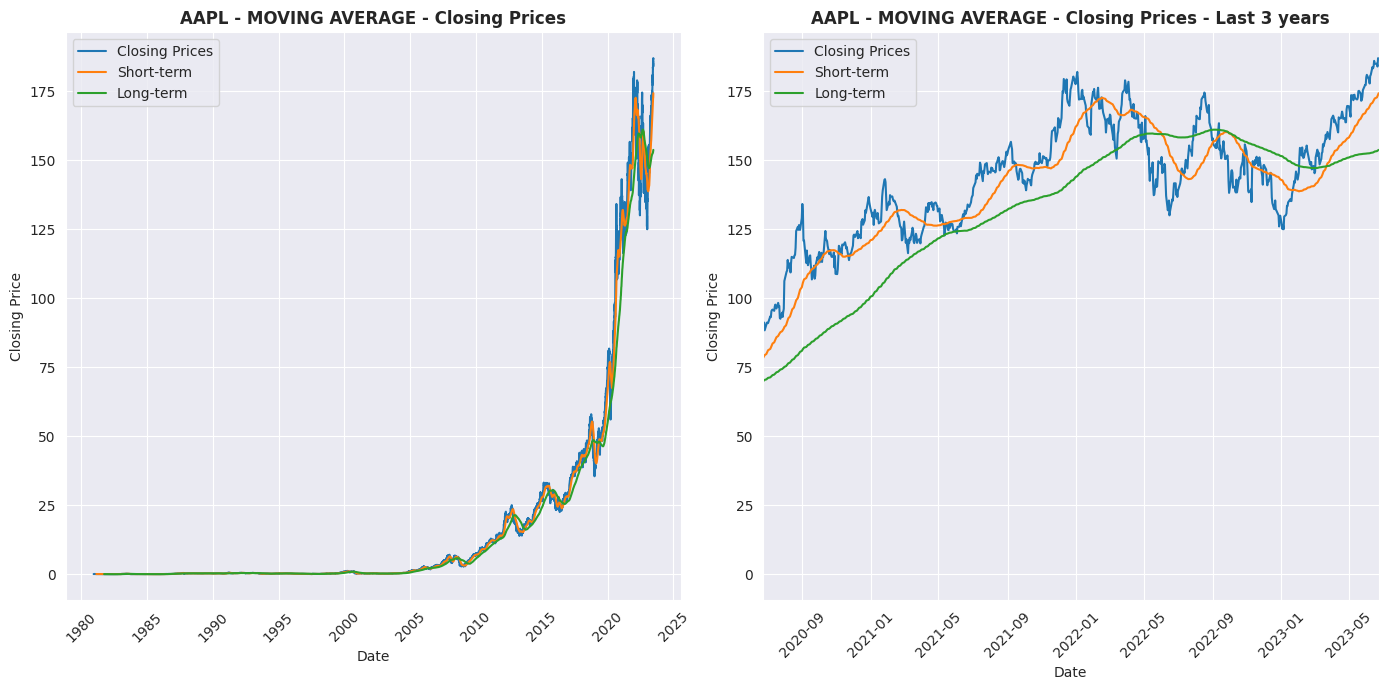

In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# AAPL MA closing prices
axs[0].plot(apple_data['Close'], label='Closing Prices')
axs[0].plot(AAPL_MA[0], label='Short-term')
axs[0].plot(AAPL_MA[1], label='Long-term')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Closing Price')
axs[0].set_title('AAPL - MOVING AVERAGE - Closing Prices', fontweight='bold')
axs[0].legend()
axs[0].tick_params(axis='x', rotation=45)

# AAPL MA closing prices restricted to [2020-06-23, 2023-06-23]
axs[1].plot(apple_data['Close'], label='Closing Prices')
axs[1].plot(AAPL_MA[0], label='Short-term')
axs[1].plot(AAPL_MA[1], label='Long-term')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Closing Price')
axs[1].set_title('AAPL - MOVING AVERAGE - Closing Prices - Last 3 years', fontweight='bold')
axs[1].legend()
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xlim(pd.to_datetime('2020-06-23'), pd.to_datetime('2023-06-23'))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

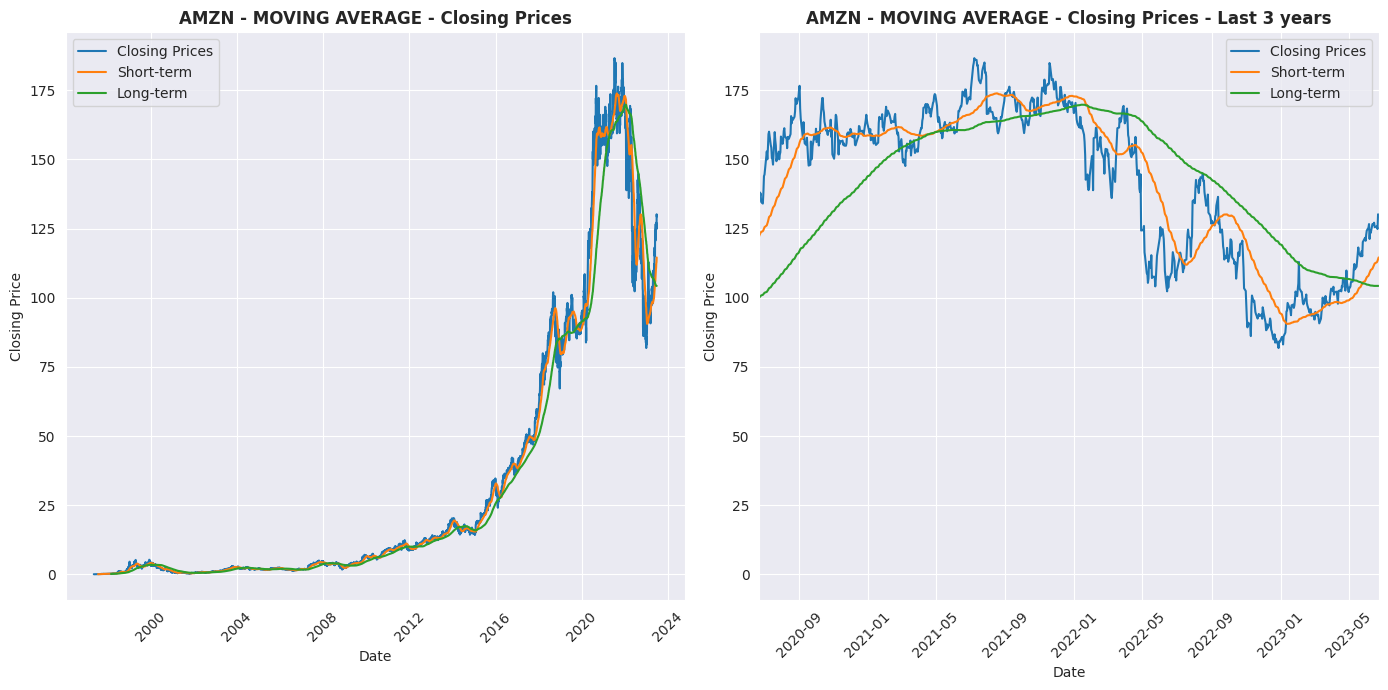

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# AMZN MA closing prices
axs[0].plot(amazon_data['Close'], label='Closing Prices')
axs[0].plot(AMZN_MA[0], label='Short-term')
axs[0].plot(AMZN_MA[1], label='Long-term')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Closing Price')
axs[0].set_title('AMZN - MOVING AVERAGE - Closing Prices', fontweight='bold')
axs[0].legend()
axs[0].tick_params(axis='x', rotation=45)

# AMZN MA closing prices restricted to [2020-06-23, 2023-06-23]
axs[1].plot(amazon_data['Close'], label='Closing Prices')
axs[1].plot(AMZN_MA[0], label='Short-term')
axs[1].plot(AMZN_MA[1], label='Long-term')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Closing Price')
axs[1].set_title('AMZN - MOVING AVERAGE - Closing Prices - Last 3 years', fontweight='bold')
axs[1].legend()
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xlim(pd.to_datetime('2020-06-23'), pd.to_datetime('2023-06-23'))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Understanding when a stock reaches the next support or resistance level can be challenging and requires in-depth knowledge of technical analysis and market dynamics.

However, even with a more simplified approach such as the moving average, analyzing the price trend can provide valuable insights for assessing the performance of models. By observing the general direction of the price movement, it is possible to identify whether the models are capturing the overall trend accurately or not.